In [1]:
import pandas as pd
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('train_v2.csv', nrows = 100000)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       100000 non-null  object
 1   customDimensions      100000 non-null  object
 2   date                  100000 non-null  int64 
 3   device                100000 non-null  object
 4   fullVisitorId         100000 non-null  object
 5   geoNetwork            100000 non-null  object
 6   hits                  100000 non-null  object
 7   socialEngagementType  100000 non-null  object
 8   totals                100000 non-null  object
 9   trafficSource         100000 non-null  object
 10  visitId               100000 non-null  int64 
 11  visitNumber           100000 non-null  int64 
 12  visitStartTime        100000 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 9.9+ MB


In [4]:
df.head()

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",3162355547410993243,"{""continent"": ""Europe"", ""subContinent"": ""Weste...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508198450,1,1508198450
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8934116514970143966,"{""continent"": ""Americas"", ""subContinent"": ""Nor...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""referralPath"": ""/a/google.com/transportation...",1508176307,6,1508176307
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",7992466427990357681,"{""continent"": ""Americas"", ""subContinent"": ""Nor...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1508201613,1,1508201613
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9075655783635761930,"{""continent"": ""Asia"", ""subContinent"": ""Western...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508169851,1,1508169851
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6960673291025684308,"{""continent"": ""Americas"", ""subContinent"": ""Cen...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508190552,1,1508190552


In [5]:
json_columns = ['device', 'geoNetwork', 'totals', 'trafficSource']

In [6]:
for cols in json_columns:
    df_norm = pd.json_normalize([json.loads(val) for val in df[cols]]).fillna(0)
    df = pd.merge(df, df_norm, left_index=True, right_index=True)

In [7]:
df = df.drop(['socialEngagementType', 'browserVersion', 'browserSize', 'operatingSystemVersion',
              'mobileDeviceBranding', 'adwordsClickInfo.criteriaParameters', 'mobileDeviceModel', 
              'mobileInputSelector', 'mobileDeviceInfo', 'mobileDeviceMarketingName', 'flashVersion', 
              'language', 'screenColors', 'screenResolution', 'metro', 'city', 'adwordsClickInfo.isVideoAd',
              'cityId', 'networkDomain', 'latitude', 'longitude', 'networkLocation',
              'campaign', 'keyword', 'referralPath', 'adwordsClickInfo.gclId',
              'device', 'geoNetwork', 'totals', 'trafficSource', 'customDimensions', 'hits_x', 'visits'
             ], axis=1)

In [8]:
df.replace(['(not set)', 'not available in demo dataset', '(none)'], np.nan, inplace=True)
df['isTrueDirect'].replace(0, 'False', inplace=True)
df['adContent'].replace(0, np.nan, inplace=True)
df['adwordsClickInfo.adNetworkType'].replace(0, np.nan, inplace=True)
df['adwordsClickInfo.slot'].replace(0, np.nan, inplace=True)

In [9]:
df['pageviews'] = df['pageviews'].astype(int)
df['newVisits'] = df['newVisits'].astype(int)
df['bounces'] = df['bounces'].astype(int)
df['hits_y'] = df['hits_y'].astype(int)
df['sessionQualityDim'] = df['sessionQualityDim'].astype(int)
df['timeOnSite'] = df['timeOnSite'].astype(int)
df['transactions'] = df['transactions'].astype(int)
df['transactionRevenue'] = df['transactionRevenue'].astype(int)
df['totalTransactionRevenue'] = df['totalTransactionRevenue'].astype(int)
df['fullVisitorId'] = df['fullVisitorId'].astype(str)
df['visitId'] = df['visitId'].astype(str)

In [10]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['weekday'] = df['date'].dt.weekday
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   channelGrouping                 100000 non-null  object        
 1   date                            100000 non-null  datetime64[ns]
 2   fullVisitorId                   100000 non-null  object        
 3   visitId                         100000 non-null  object        
 4   visitNumber                     100000 non-null  int64         
 5   visitStartTime                  100000 non-null  int64         
 6   browser                         99999 non-null   object        
 7   operatingSystem                 99308 non-null   object        
 8   isMobile                        100000 non-null  bool          
 9   deviceCategory                  100000 non-null  object        
 10  continent                       99873 non-null   object  

In [12]:
df.describe()

,visitNumber,visitStartTime,hits_y,pageviews,bounces,newVisits,sessionQualityDim,timeOnSite,transactions,transactionRevenue,totalTransactionRevenue,weekday,day,month,year
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.00000,100000.000000,100000.000000
mean,2.333650,1.498890e+09,4.367070,3.647260,0.49854,0.763650,1.645700,121.038450,0.010580,1.187122e+06,1.364352e+06,3.193020,15.21467,6.681180,2016.983600
std,8.991106,1.625577e+07,8.596425,6.147004,0.50000,0.424842,7.536121,344.536245,0.110942,2.841594e+07,3.310492e+07,1.674405,7.89856,3.879057,0.708291
min,1.000000,1.470899e+09,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.00000,1.000000,2016.000000
25%,1.000000,1.481673e+09,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,2.000000,11.00000,3.000000,2016.000000
50%,1.000000,1.498295e+09,2.000000,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,3.000000,14.00000,6.000000,2017.000000
75%,1.000000,1.512092e+09,4.000000,4.000000,1.00000,1.000000,1.000000,76.000000,0.000000,0.000000e+00,0.000000e+00,4.000000,21.00000,11.000000,2017.000000
max,401.000000,1.525072e+09,331.000000,230.000000,1.00000,1.000000,96.000000,9837.000000,8.000000,5.498000e+09,5.501000e+09,6.000000,30.00000,12.000000,2018.000000


In [13]:
df.to_csv('df_clean.csv', index=False)

In [14]:
df_clean = pd.read_csv('df_clean.csv')

/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
df_clean.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,...,medium,isTrueDirect,adContent,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.adNetworkType,weekday,day,month,year
0,Organic Search,2017-10-16,3162355547410993243,1508198450,1,1508198450,Firefox,Windows,False,desktop,...,organic,False,NaN,0,NaN,NaN,0,16,10,2017
1,Referral,2017-10-16,8934116514970143966,1508176307,6,1508176307,Chrome,Chrome OS,False,desktop,...,referral,False,NaN,0,NaN,NaN,0,16,10,2017
2,Direct,2017-10-16,7992466427990357681,1508201613,1,1508201613,Chrome,Android,True,mobile,...,NaN,True,NaN,0,NaN,NaN,0,16,10,2017
3,Organic Search,2017-10-16,9075655783635761930,1508169851,1,1508169851,Chrome,Windows,False,desktop,...,organic,False,NaN,0,NaN,NaN,0,16,10,2017
4,Organic Search,2017-10-16,6960673291025684308,1508190552,1,1508190552,Chrome,Windows,False,desktop,...,organic,False,NaN,0,NaN,NaN,0,16,10,2017


In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   channelGrouping                 100000 non-null  object
 1   date                            100000 non-null  object
 2   fullVisitorId                   100000 non-null  object
 3   visitId                         100000 non-null  int64 
 4   visitNumber                     100000 non-null  int64 
 5   visitStartTime                  100000 non-null  int64 
 6   browser                         99999 non-null   object
 7   operatingSystem                 99308 non-null   object
 8   isMobile                        100000 non-null  bool  
 9   deviceCategory                  100000 non-null  object
 10  continent                       99873 non-null   object
 11  subContinent                    99873 non-null   object
 12  country                        

In [23]:
df_clean['visitId'] = df_clean['visitId'].astype(str)
df_clean['adwordsClickInfo.page'] = df_clean['adwordsClickInfo.page'].astype(str)

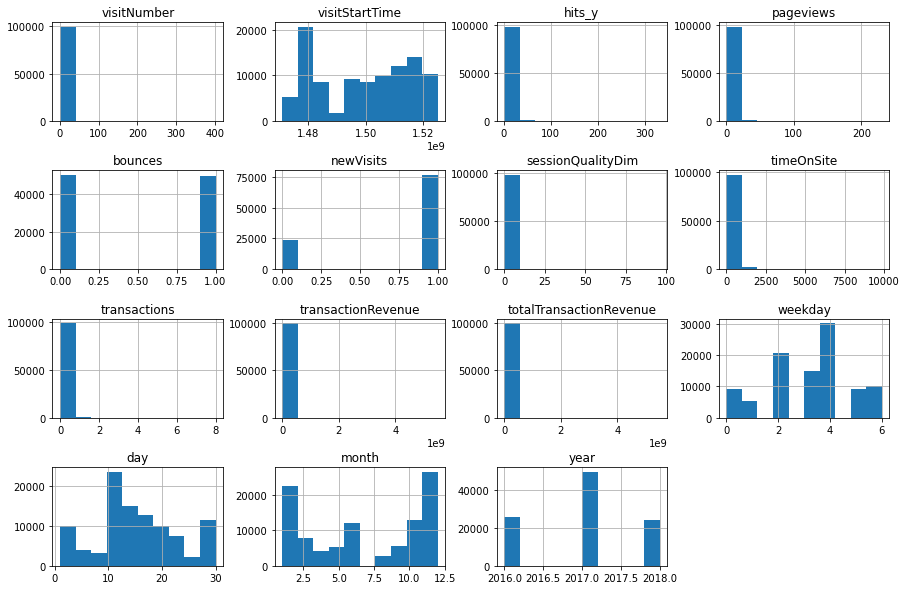

In [24]:
df_clean.hist(figsize = (15,10))
plt.subplots_adjust(hspace=0.5);

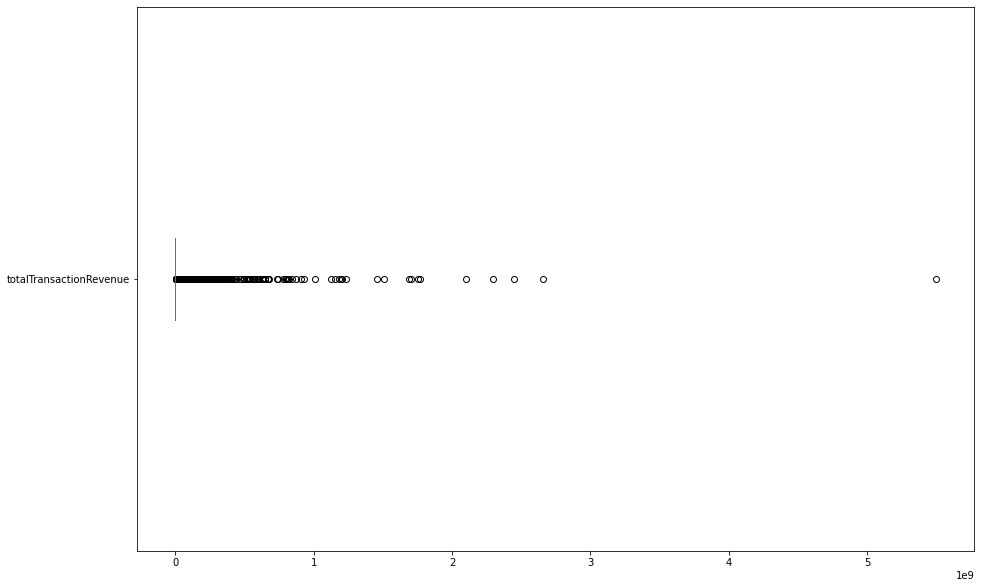

In [25]:
plt.figure(figsize=(15, 10))
df_clean['totalTransactionRevenue'].plot(kind='box', vert=False);

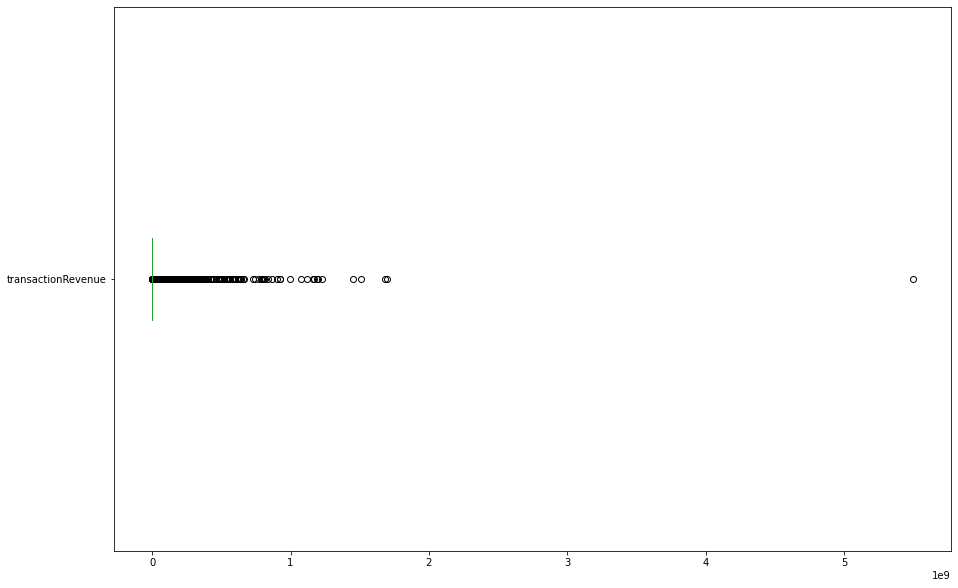

In [26]:
plt.figure(figsize=(15, 10))
df_clean['transactionRevenue'].plot(kind='box', vert=False);

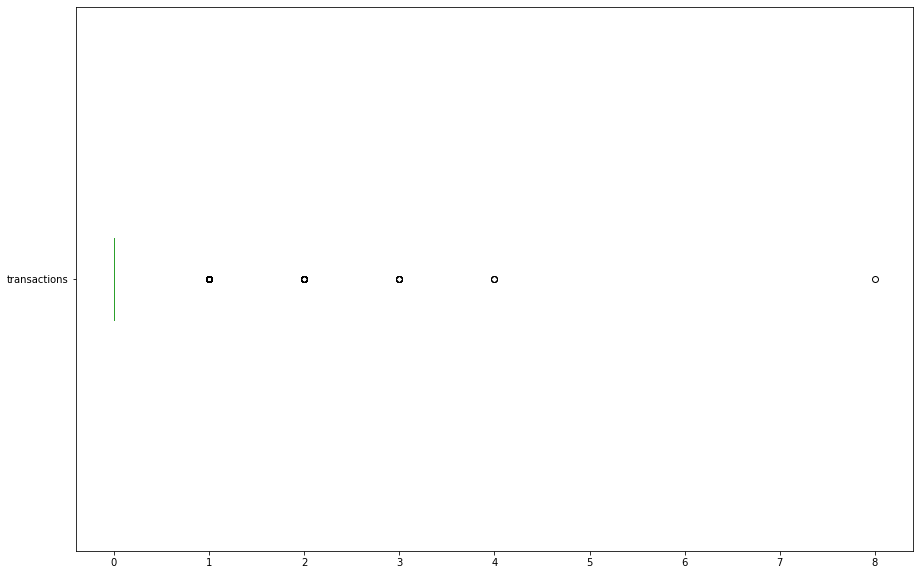

In [27]:
plt.figure(figsize=(15, 10))
df_clean['transactions'].plot(kind='box', vert=False);

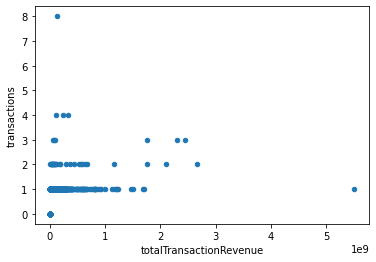

In [28]:
df.plot(x='totalTransactionRevenue', y='transactions', kind='scatter');

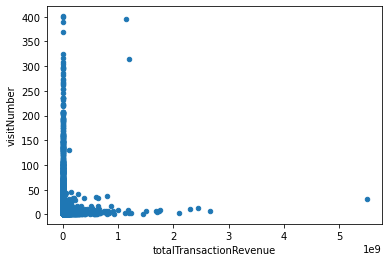

In [29]:
df.plot(x='totalTransactionRevenue', y='visitNumber', kind='scatter');

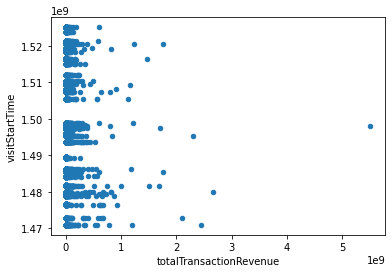

In [30]:
df.plot(x='totalTransactionRevenue', y='visitStartTime', kind='scatter');

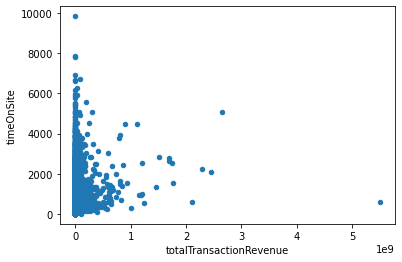

In [31]:
df.plot(x='totalTransactionRevenue', y='timeOnSite', kind='scatter');

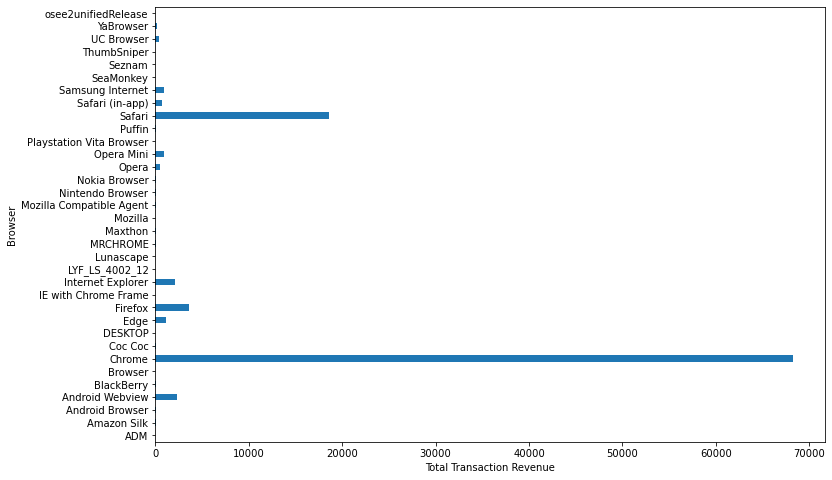

In [32]:
plt.figure(figsize=(12, 8))
df.groupby('browser')['totalTransactionRevenue'].count().plot(kind='barh')
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Browser');

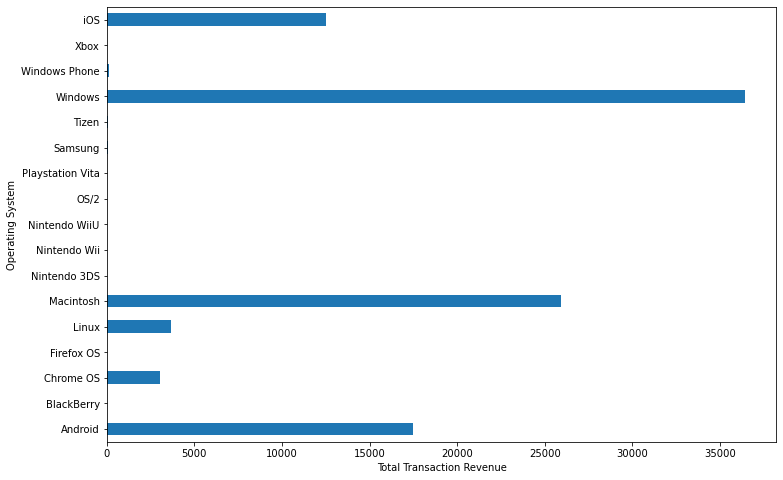

In [33]:
plt.figure(figsize=(12, 8))
df.groupby('operatingSystem')['totalTransactionRevenue'].count().plot(kind='barh')
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Operating System');

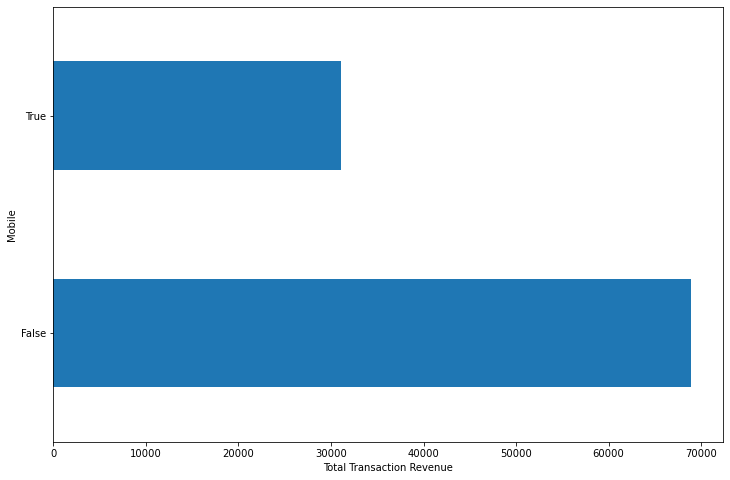

In [34]:
plt.figure(figsize=(12, 8))
df.groupby('isMobile')['totalTransactionRevenue'].count().plot(kind='barh') 
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Mobile');

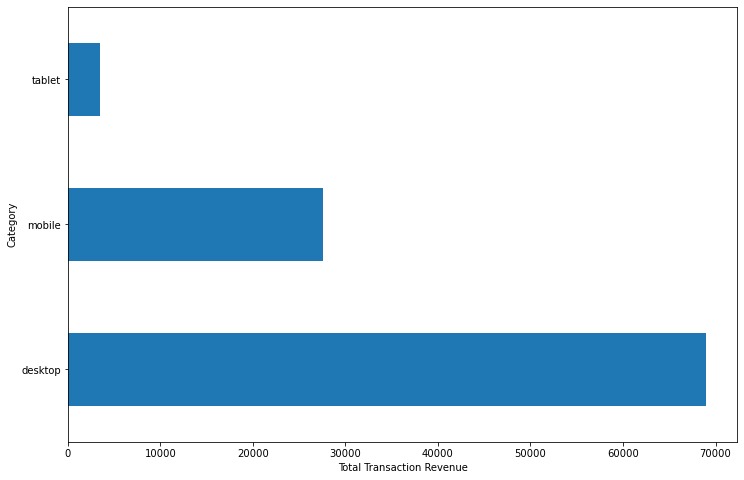

In [35]:
plt.figure(figsize=(12, 8))
df.groupby('deviceCategory')['totalTransactionRevenue'].count().plot(kind='barh')
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Category');

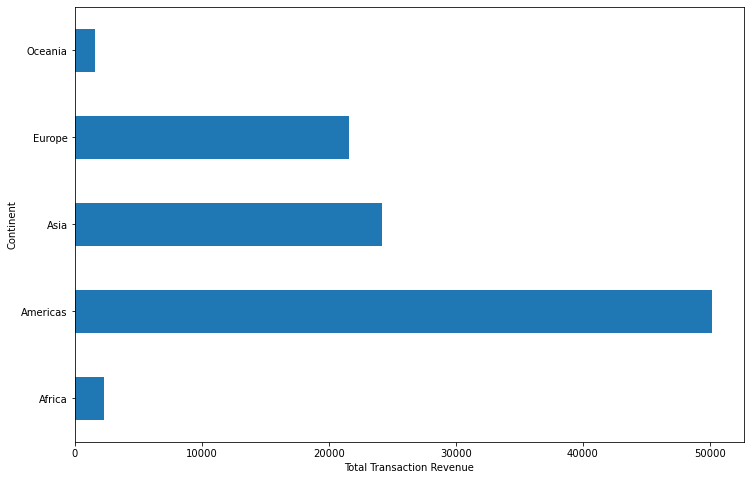

In [36]:
plt.figure(figsize=(12, 8))
df.groupby('continent')['totalTransactionRevenue'].count().plot(kind='barh') 
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Continent');

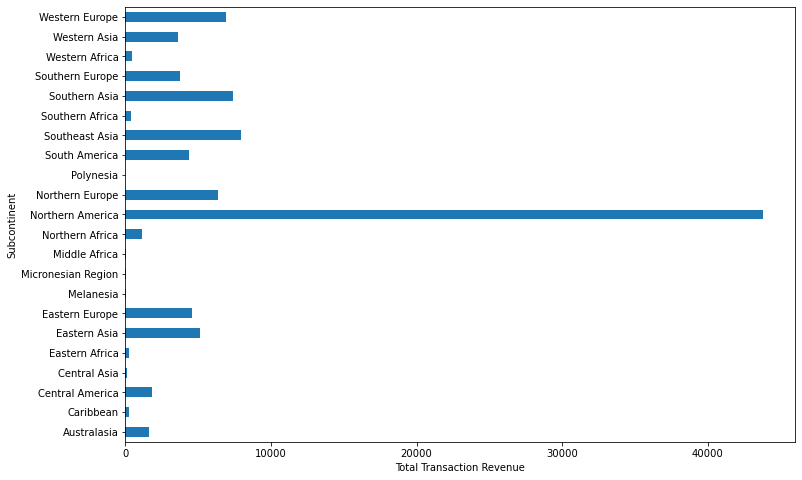

In [37]:
plt.figure(figsize=(12, 8))
df.groupby('subContinent')['totalTransactionRevenue'].count().plot(kind='barh') 
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Subcontinent');

<Figure size 864x576 with 0 Axes>

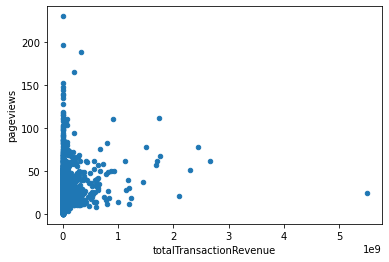

In [38]:
plt.figure(figsize=(12, 8))
df.plot(x='totalTransactionRevenue', y='pageviews', kind='scatter');

<Figure size 864x576 with 0 Axes>

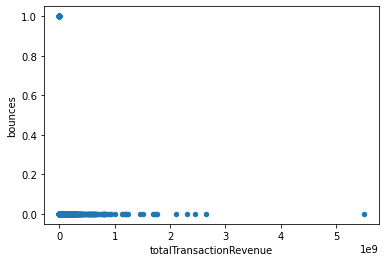

In [39]:
plt.figure(figsize=(12, 8))
df.plot(x='totalTransactionRevenue', y='bounces', kind='scatter');

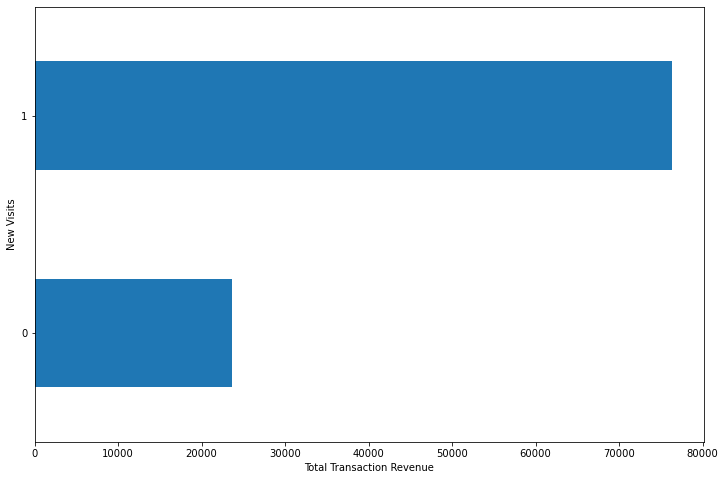

In [40]:
plt.figure(figsize=(12, 8))
df.groupby('newVisits')['totalTransactionRevenue'].count().plot(kind='barh') 
plt.xlabel('Total Transaction Revenue')
plt.ylabel('New Visits');

<Figure size 864x576 with 0 Axes>

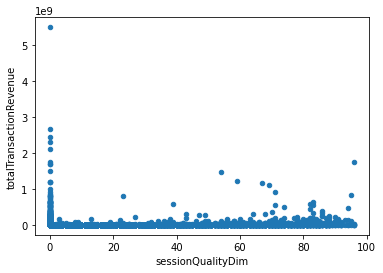

In [41]:
plt.figure(figsize=(12, 8))
df.plot(y='totalTransactionRevenue', x='sessionQualityDim', kind='scatter');


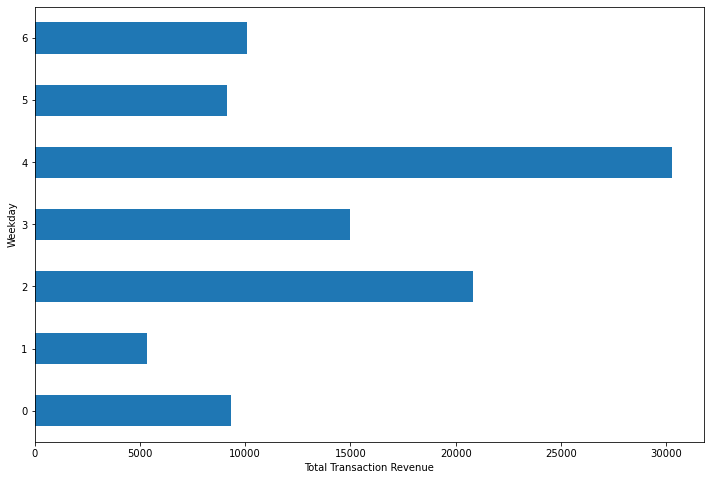

In [42]:
plt.figure(figsize=(12, 8))
df.groupby('weekday')['totalTransactionRevenue'].count().plot(kind='barh') 
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Weekday');

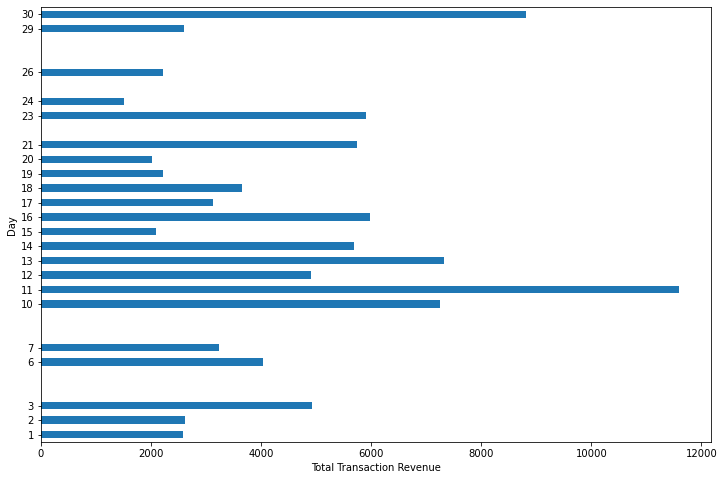

In [43]:
plt.figure(figsize=(12, 8))
df.groupby('day')['totalTransactionRevenue'].count().plot(kind='barh') 
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Day');

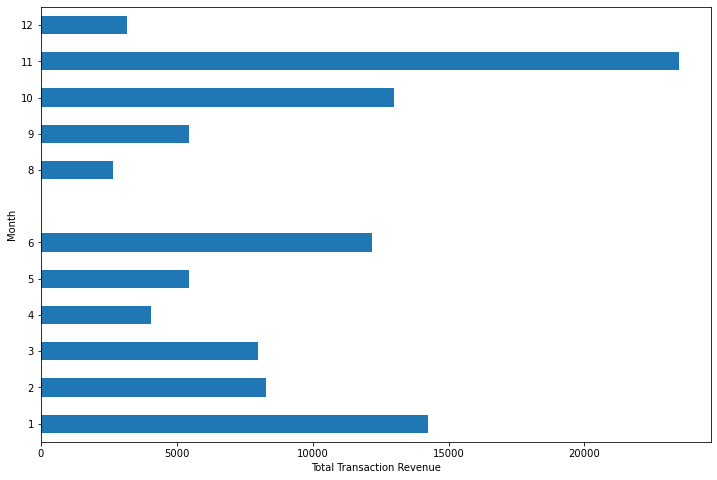

In [44]:
plt.figure(figsize=(12, 8))
df.groupby('month')['totalTransactionRevenue'].count().plot(kind='barh') 
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Month');

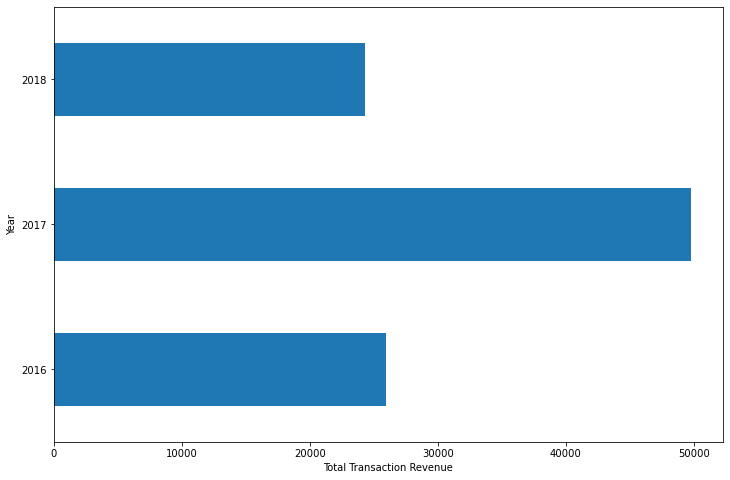

In [45]:
plt.figure(figsize=(12, 8))
df.groupby('year')['totalTransactionRevenue'].count().plot(kind='barh') 
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Year');

<AxesSubplot:xlabel='weekday', ylabel='totalTransactionRevenue'>

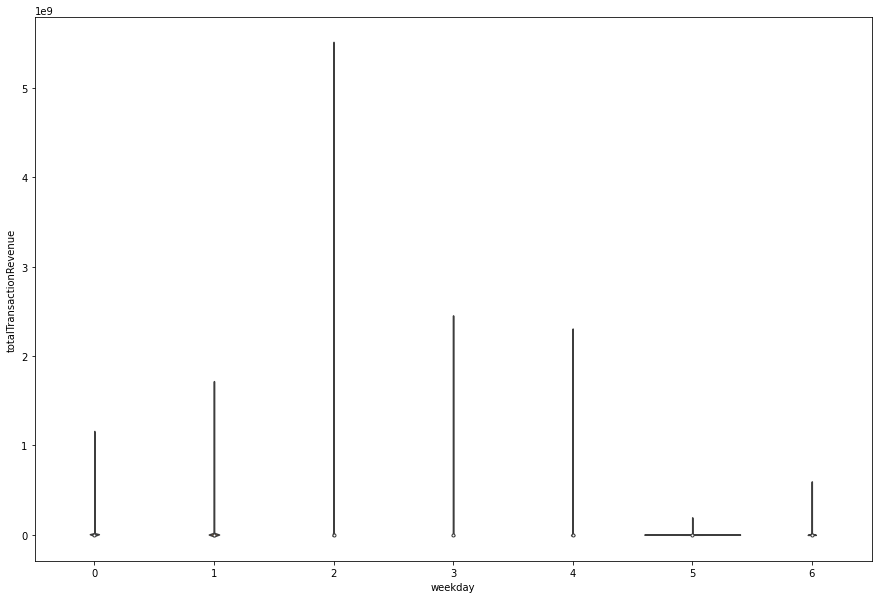

In [46]:
plt.figure(figsize = [15, 10]) 
sb.violinplot(data = df_clean, x = 'weekday', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='year', ylabel='totalTransactionRevenue'>

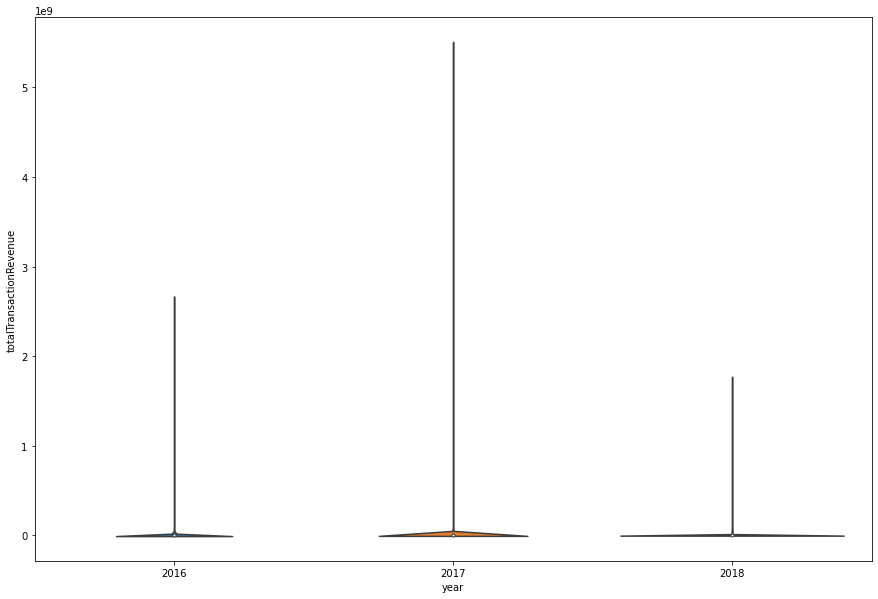

In [47]:
plt.figure(figsize = [15, 10]) 
sb.violinplot(data = df_clean, x = 'year', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='transactions', ylabel='totalTransactionRevenue'>

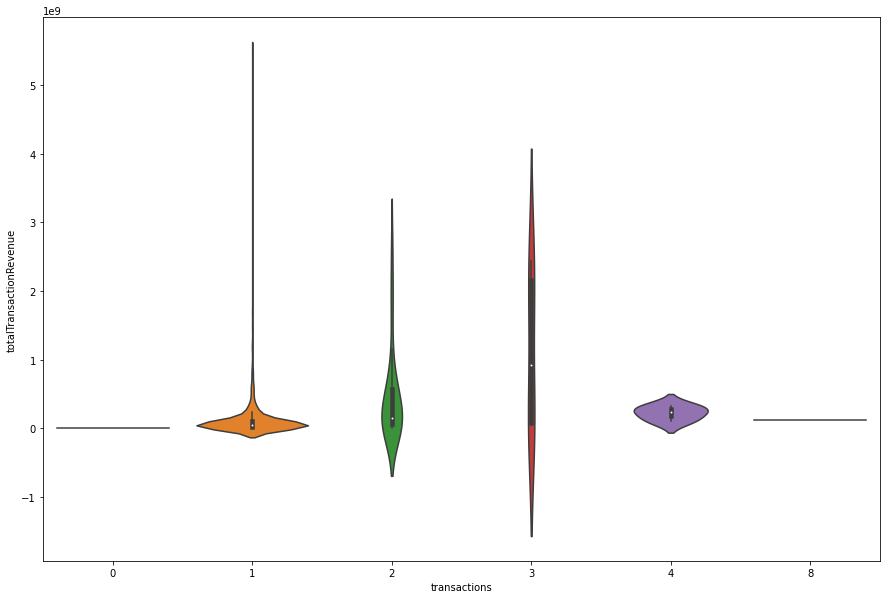

In [48]:
plt.figure(figsize = [15, 10]) 
sb.violinplot(data = df_clean, x = 'transactions', y = 'totalTransactionRevenue')

<AxesSubplot:xlabel='continent', ylabel='totalTransactionRevenue'>

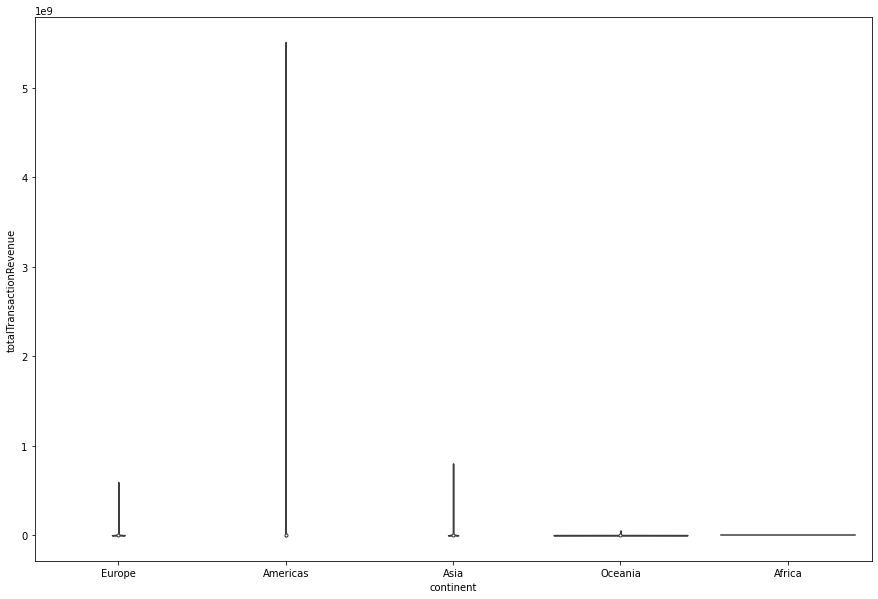

In [49]:
plt.figure(figsize = [15, 10]) 
sb.violinplot(data = df_clean, x = 'continent', y = 'totalTransactionRevenue')

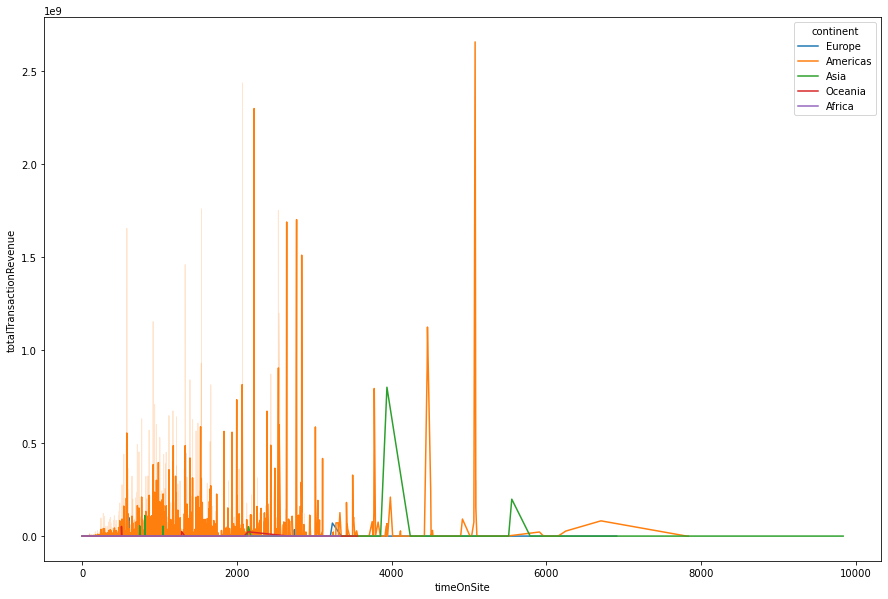

In [50]:
plt.figure(figsize = [15, 10]) 
sb.lineplot(data = df_clean, y = 'totalTransactionRevenue', x = 'timeOnSite', hue = 'continent');

In [51]:
df_clean['fullVisitorId'].duplicated().sum()

8794

In [52]:
df_users = df_clean[['fullVisitorId', 'totalTransactionRevenue']]

In [53]:
df_users.head()

,fullVisitorId,totalTransactionRevenue
0,3162355547410993243,0
1,8934116514970143966,0
2,7992466427990357681,0
3,9075655783635761930,0
4,6960673291025684308,0


In [54]:
df_users = df_users.groupby('fullVisitorId')['totalTransactionRevenue'].sum()

In [55]:
df_users.describe()

count    9.120600e+04
mean     1.495901e+06
std      3.948121e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.799600e+09
Name: totalTransactionRevenue, dtype: float64

In [56]:
df_clean['totalTransactionRevenue'].describe()

count    1.000000e+05
mean     1.364352e+06
std      3.310492e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.501000e+09
Name: totalTransactionRevenue, dtype: float64

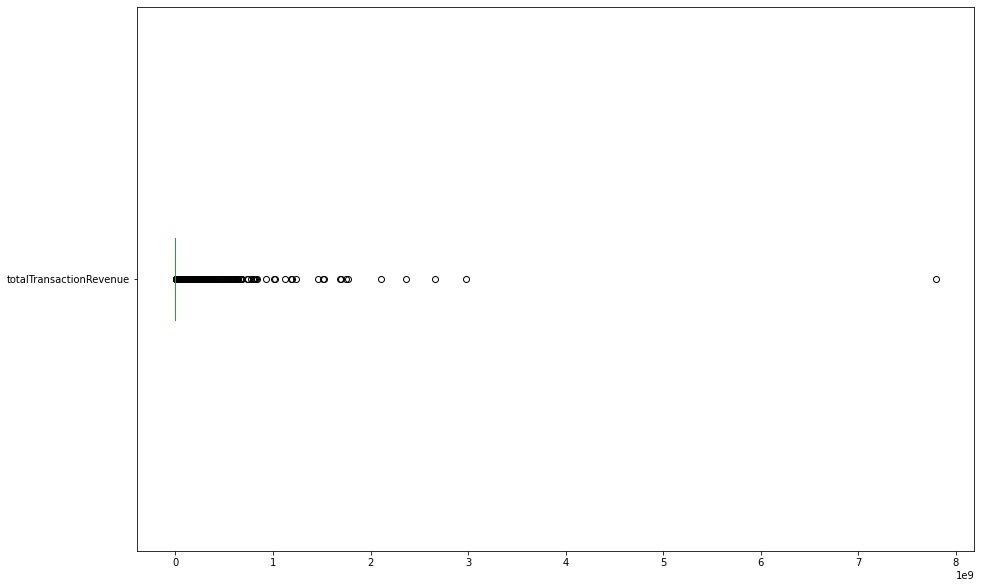

In [58]:
plt.figure(figsize=(15, 10))
df_users.plot(kind='box', vert=False);